In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import ast

df = pd.read_csv('assets/parsed_books_popular.csv')
df = df[df['Title'] != 'Little Women; Or, Meg, Jo, Beth, and Amy'] #Duplicate


Moby Dick; Or, The Whale 214672 20628
Middlemarch 321300 19132
Pride and Prejudice 129222 7666
Dracula 162808 10939
Anna Karenina 356408 15200
A Tale of Two Cities 138652 11335
The Brothers Karamazov 356917 14913
Crime and Punishment 207586 11063
Adventures of Huckleberry Finn 112860 8027
War and Peace 571190 21722
Great Expectations 188997 12655
Ulysses 265162 30662
Little Women 189229 12256
Emma 161105 9336


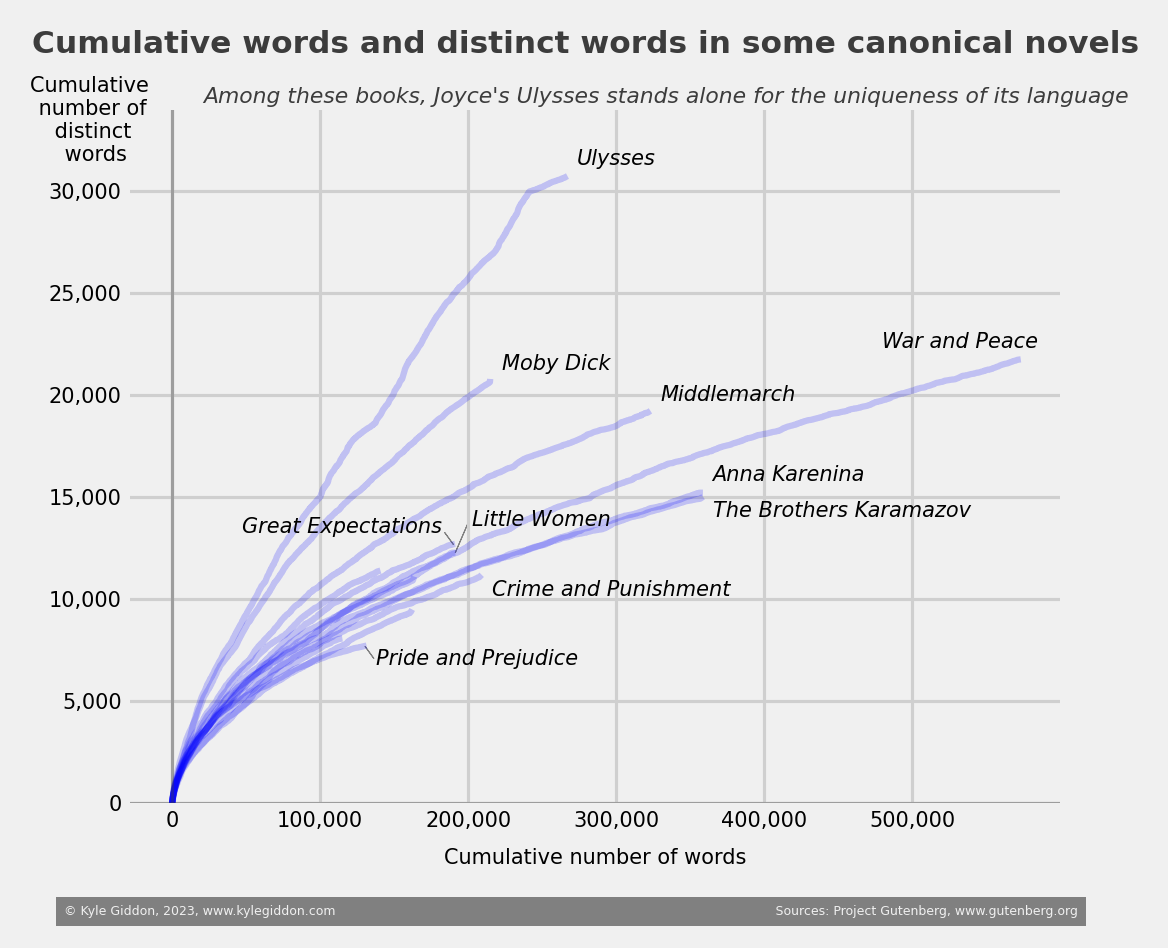

In [2]:
# Create graph
fig, ax = plt.subplots(figsize=[4, 3], dpi=300)

# Set backgrounds to light grey
fig.patch.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

# Remove box (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set major gridlines
ax.grid(True, color='#cfcfcf',linewidth=0.75)

# Creating the plot
max_y = 0
for _, row in df.iterrows():

    y_values = ast.literal_eval(row['result'])
    x_values = list(range(1, len(y_values) + 1))
    title = row['Title']
    author = row['Authors']
    plt.plot(x_values, y_values,linewidth=1.5,alpha=.2,color='blue')
    
    # Labeling the line near its last data point - only for top data points
    last_x = x_values[-1]
    last_y = y_values[-1]
    if last_y > max_y:
        max_y = last_y

    print(title,last_x,last_y)

    # Custom modifications to labels
    # Choose which books to label
    if title in ['War and Peace', 'Ulysses','Moby Dick; Or, The Whale','Anna Karenina', 'The Brothers Karamazov', 'Pride and Prejudice', 'Great Expectations', 'Middlemarch','Little Women','Crime and Punishment']:

        if title == 'War and Peace':
            last_x -= 100000

        elif title == 'Moby Dick; Or, The Whale':
            title = 'Moby Dick'

        elif title == 'The Brothers Karamazov':
            last_y -= 1500

        elif title == 'Crime and Punishment':
            last_y -= 1500            

        elif title == 'Pride and Prejudice':
            plt.arrow(last_x+1000, last_y, dx=6000, dy=-600,linewidth=0.25,color='gray')         
            last_y -= 1500            

        elif title == 'Great Expectations':
            plt.arrow(last_x+1000, last_y, dx=-6000, dy=600,linewidth=0.25,color='gray')         
            last_x -= 150000            

        elif title == 'Little Women':
            plt.arrow(last_x+2000, last_y, dx=9500, dy=1600,linewidth=0.25,color='gray')         
            last_x += 5000      
            last_y +=700

        plt.annotate(f'{title}', (last_x, last_y), textcoords="offset points", xytext=(3,3), ha='left', fontsize=5, style='italic')

ax.tick_params(axis = 'both', which = 'major', labelsize = 5)
ax.tick_params(axis='x', rotation=0)
ax.axhline(y=0, color='#414141', linewidth=0.75, alpha=.35)
ax.axvline(x=0, color='#414141', linewidth=0.75, alpha=.35)
ax.set_facecolor('#f0f0f0')

# Adding legend, title, and labels

ax.text(x = -95000, y = max_y*1.20, s = "Cumulative words and distinct words in some canonical novels",
               fontsize = 7.5, weight = 'bold', alpha = .75)
ax.text(x = 21000, y = max_y*1.12, s = """Among these books, Joyce's Ulysses stands alone for the uniqueness of its language""",
               fontsize = 5.25, style = 'italic', alpha = .75)

# Axis labels
ax.set_ylabel("""Cumulative \n number of \n distinct \n words""",rotation=0,size=5)
ax.yaxis.set_label_coords(x=-0.04,y=0.92,transform=None)
ax.set_xlabel("""Cumulative number of words""",rotation=0,size=5)

# Format
ax.tick_params(axis='both', length=0, pad=2)
ax.get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(0,34000)

# Footer
ax.text(x = -73000, y = max_y * -0.18, 
        s = """© Kyle Giddon, 2023, www.kylegiddon.com""" + ''.join(' ' for _ in range(110)) + """Sources: Project Gutenberg, www.gutenberg.org""",
        fontsize = 3, 
        color = '#f0f0f0', 
        bbox=dict(facecolor='grey', edgecolor='none', pad=2))
plt.show()